In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    return img

# Функція для зчитування зображення в RGB
def load_RGB(file):
    img = cv2.imread(file, cv2.IMREAD_COLOR)
    img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img_RGB

In [3]:
def show(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show

def show_RGB(img_RGB):
    plt.imshow(img_RGB)
    plt.axis('off')
    plt.show

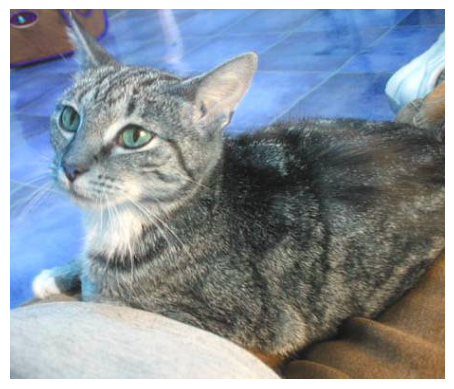

In [6]:
image1 = load(r'''C:\Users\solov\DZ57/cat.jpg''')
show(image1)

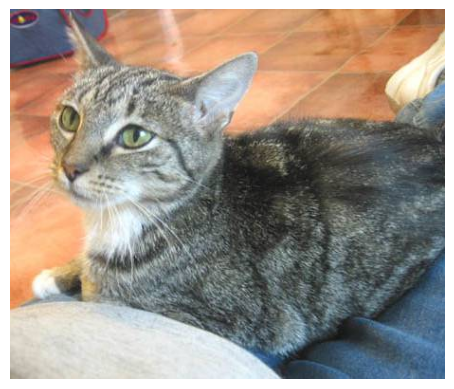

In [9]:
image1_RGB = load_RGB(r'''C:\Users\solov\DZ57/cat.jpg''')
show_RGB(image1_RGB)

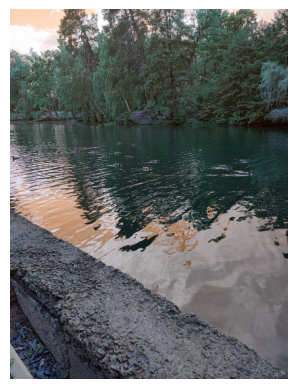

In [11]:
image2 = load(r'''C:\Users\solov\DZ57/kind.jpg''')
show(image2)

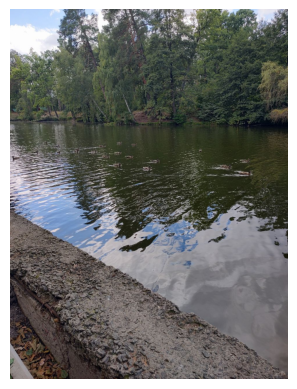

In [13]:
image2_RGB = load_RGB(r'''C:\Users\solov\DZ57/kind.jpg''')
show_RGB(image2_RGB)

In [14]:
def save_file(img):
    cv2.imwrite(file_name, img)

In [17]:
file_name = 'Image/cat_.jpg'

save_file(load(r'''C:\Users\solov\DZ57/cat.jpg'''))

In [19]:
file_name = 'Image/kind_.jpg'

save_file(load(r'''C:\Users\solov\DZ57/kind.jpg'''))

In [20]:
def auto_contrast(img):
    clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8)) # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)                # convert from BGR to LAB color space
    l, a, b = cv2.split(lab)                                  # split on 3 different channels
    l2 = clahe.apply(l)                                       # apply CLAHE to the L-channel
    lab = cv2.merge((l2,a,b))                                 # merge channels
    return cv2.cvtColor(lab, cv2.COLOR_LAB2RGB)               # convert from LAB to RGB

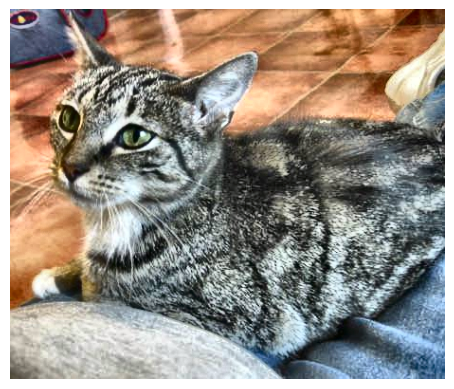

In [21]:
image1_auto_contrast = auto_contrast(load(r'''C:\Users\solov\DZ57/cat.jpg'''))

show(image1_auto_contrast)

file_name = 'Image/image1_auto_contrast.jpg'

save_file(image1_auto_contrast)

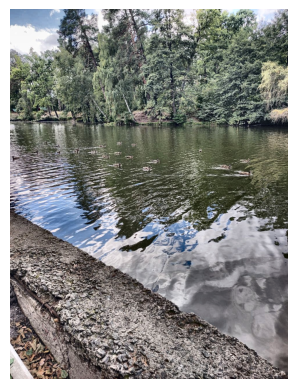

In [22]:
image2_auto_contrast = auto_contrast(load(r'''C:\Users\solov\DZ57/kind.jpg'''))

show(image2_auto_contrast)

file_name = 'Image/image2_auto_contrast.jpg'

save_file(image2_auto_contrast)

In [23]:
def change_contrast(img, alpha, beta):
    # Змінюємо контраст
    new_image = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return new_image

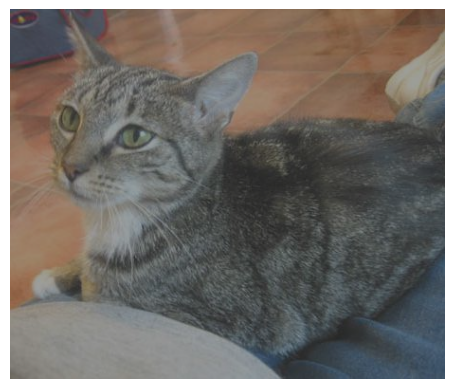

In [26]:
img = load_RGB(r'''C:\Users\solov\DZ57/cat.jpg''')
image1_contr = change_contrast(img, 0.5, 30)


show(image1_contr)
# plt.imshow(image1_contr)
# plt.axis('off')
# plt.show

file_name = 'Image/image1_contrast.jpg'

save_file(image1_contr)

In [27]:
def change_brightness(img, value):
    # Змінюємо яскравість
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    v += value
    final_hsv = cv2.merge((h, s, v))
    new_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return new_image


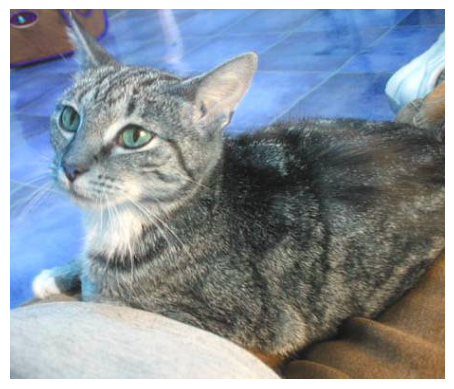

In [28]:
image1_brightness = load(r'''C:\Users\solov\DZ57/cat.jpg''')
change_brightness(image1_brightness, 200)
# plt.imshow(image1_brightness)
# plt.axis('off')
# plt.show

show(image1_brightness)
file_name = 'Image/image1_brightness.jpg'

save_file(image1_brightness)

In [30]:
def change_saturation(img):
    x = 5
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)   # Конвертуємо зображення з формату BGR в HSV
    hsv_img[:, :, 1] = hsv_img[:, :, 1] * x          # Збільшуємо / зменшуємо насиченість
    satur = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)  # Перетворюємо зображення з формату HSV в RGB
    return satur

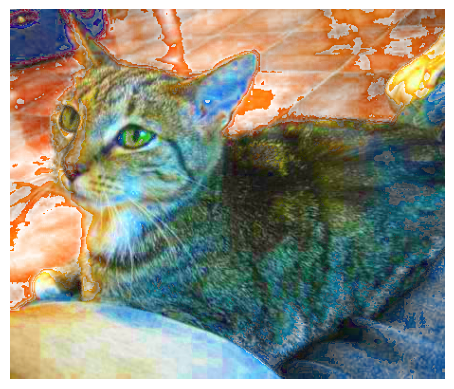

In [33]:
image1_saturation = change_saturation(load(r'''C:\Users\solov\DZ57/cat.jpg'''))
# plt.imshow(image1_saturation)
# plt.axis('off')
# plt.show

show(image1_saturation)
file_name = 'Image/image1_saturation.jpg'
save_file(image1_saturation)

In [34]:
def resize_image(img, width, height):
    resized_img = cv2.resize(img, (width, height))
    return resized_img

In [35]:
im = load(r'''C:\Users\solov\DZ57/cat.jpg''')
print(f'розмір зображення {im.shape[0]} x {im.shape[1]}')

розмір зображення 390 x 459


In [36]:
image1_resized = resize_image(im, 1600, 1200)
print(f'розмір зображення {image1_resized.shape[0]} x {image1_resized.shape[1]}')

розмір зображення 1200 x 1600


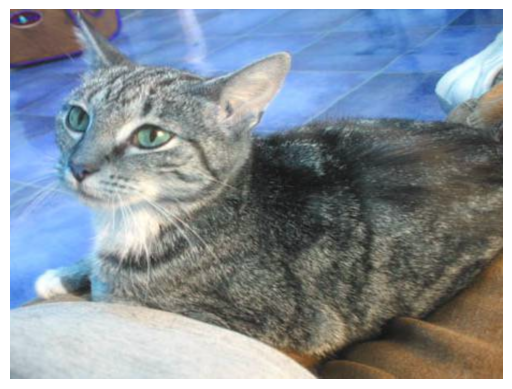

In [37]:
show(image1_resized)
file_name = 'Image/image1_resized.jpg'
save_file(image1_resized)

In [38]:
def crop_image(img, x1, y1, x2, y2):
    return img[x1:x2,y1:y2]

In [40]:
im = load(r'''C:\Users\solov\DZ57/kind.jpg''')
im.shape

(1280, 960, 3)

In [41]:
im = load_RGB(r'''C:\Users\solov\DZ57/kind.jpg''')
im_cropped = crop_image(im, 200, 200, 1500, 1500)
im_cropped.shape

(1080, 760, 3)

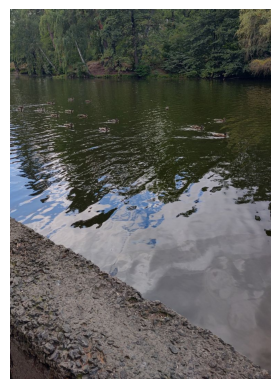

In [42]:
show(im_cropped)
file_name = 'Image/image4_cropped.jpg'
save_file(im_cropped)

In [43]:
def rotate_image(img, angle):
    # Отримуємо висоту та ширину зображення
    (h, w) = img.shape[:2]
    # Обчислюємо центр зображення
    center = (w / 2, h / 2)
    # Обчислюємо матрицю перетворення та повертаємо зображення
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_img = cv2.warpAffine(img, M, (w, h))
    return rotated_img

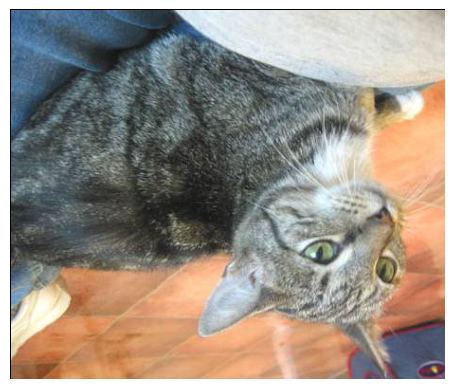

In [45]:
img1_rotated = rotate_image(load_RGB(r'''C:\Users\solov\DZ57/cat.jpg'''), 180)

show(img1_rotated)
file_name = 'Image/image1_rotated.jpg'
save_file(img1_rotated)